In [1]:
import random
import math
import statistics as st
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def coin_flip():
    """Flips a coin"""
    return random.choice(["heads", "tails"])

In [4]:
def simulation(n=16):
    """Flips a coin 2**n times and records how many flips have been heads/tails every 2**nth
    flip."""
    count = 0
    heads = 0
    tails = 0
    total_heads = []
    total_tails = []
    while count < 2**n:
        flip = coin_flip()
        if flip == "heads":
            heads += 1
        else:
            tails += 1
        count += 1
        for num in range(n+1):
            if count == 2**num:
                total_heads.append(heads)
                total_tails.append(tails)

    return total_heads, total_tails

In [5]:
h, t = simulation()

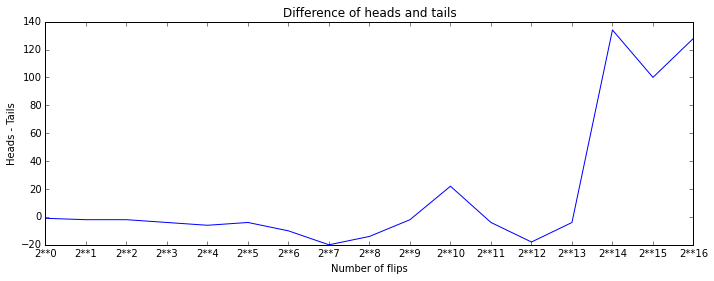

In [6]:
y1 = [h[index] - t[index] for index in range(len(h))]
x1 = ["2**" + str(n) for n in range(17)]

plt.plot(y1)
plt.xticks(range(17), x1)
plt.xlabel("Number of flips")
plt.ylabel("Heads - Tails")
plt.title("Difference of heads and tails")
plt.subplots_adjust(left=2, right=3.5)
plt.show()


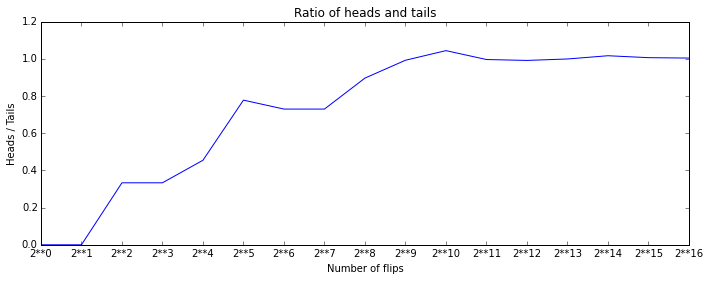

In [7]:
y1 = [h[index] / t[index] for index in range(len(h))]
x1 = ["2**" + str(n) for n in range(17)]

plt.plot(y1)
plt.xticks(range(17), x1)
plt.xlabel("Number of flips")
plt.ylabel("Heads / Tails")
plt.title("Ratio of heads and tails")
plt.subplots_adjust(left=2, right=3.5)
plt.show()

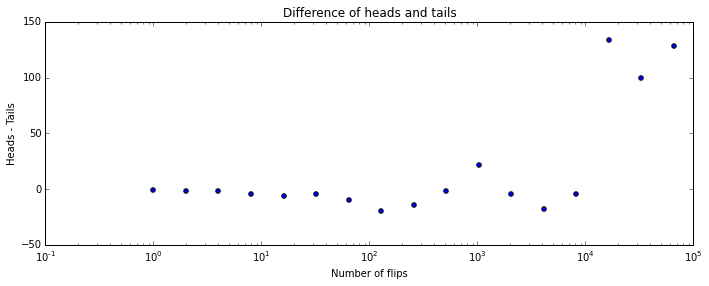

In [14]:
y1 = [h[index] - t[index] for index in range(len(h))]
x1 = [2**n for n in range(17)]
plt.scatter(x1, y1)
plt.xscale('log')
plt.xlabel("Number of flips")
plt.ylabel("Heads - Tails")
plt.title("Difference of heads and tails")
plt.subplots_adjust(left=2, right=3.5)
# x1,x2,y1,y2 = plt.axis()
# plt.axis([0.9,x2,y1,y2])
plt.show()

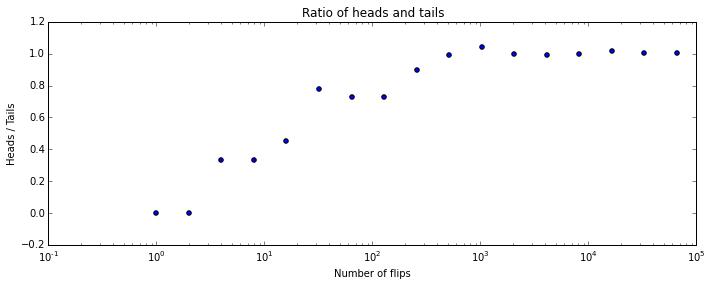

In [15]:
y1 = [h[index] / t[index] for index in range(len(h))]
x1 = [2**n for n in range(17)]
plt.scatter(x1, y1)
plt.xscale('log')
plt.xlabel("Number of flips")
plt.ylabel("Heads / Tails")
plt.title("Ratio of heads and tails")
plt.subplots_adjust(left=2, right=3.5)
# xmin,xmax,ymin,ymax = plt.axis()
# plt.axis([0.9,xmax,ymin,ymax])
plt.show()

##Notes
The differences stay relatively close to zero (they diverge as number of flips grows, but proportionally stays close to zero).

The ratios approach one as number of flips increases.

#Multiple Simulation
    

In [23]:
def h_t_ratio(list1, list2):
    ratio_list = []
    for index in range(len(list1)):
        if list2[index] != 0:
            ratio_list.append(list1[index] / list2[index])
        else:
            ratio_list.append(0)
    return ratio_list

In [30]:
def multi_sim(num=20):
    sim_results = {}
    for n in range(num):
        h, t = simulation()
        ratios = h_t_ratio(h, t)
        for index in range(len(ratios)):
            sim_results[index] = sim_results.get(index, [])
            sim_results[index].append(ratios[index])
        
    return sim_results

In [36]:
ratios_dict = multi_sim()

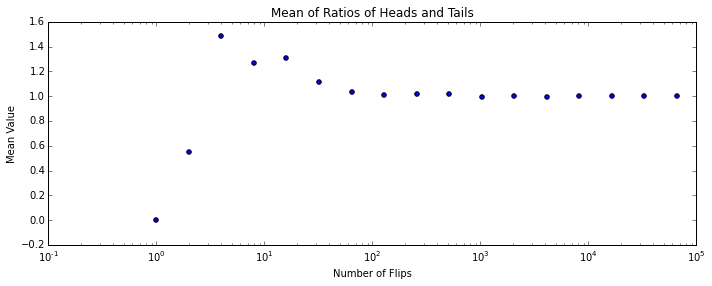

In [43]:
y1 = [st.mean(value) for key, value in ratios_dict.items()]
x1 = [2**n for n in range(17)]

plt.scatter(x1, y1)
plt.xscale('log')
plt.xlabel("Number of Flips")
plt.ylabel("Mean Value")
plt.title("Mean of Ratios of Heads and Tails")
plt.subplots_adjust(left=2, right=3.5)
plt.show()

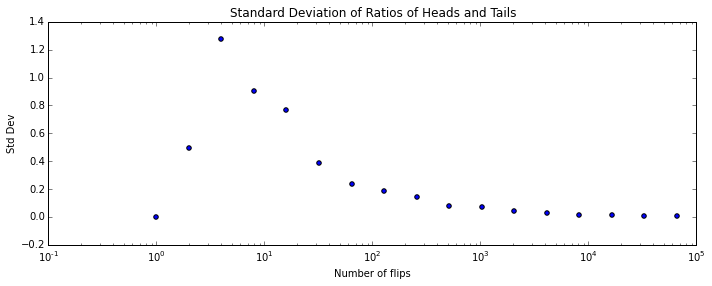

In [48]:
y1 = [st.pstdev(value) for key, value in ratios_dict.items()]
x1 = [2**n for n in range(17)]

plt.scatter(x1, y1)
plt.xscale('log')
plt.xlabel("Number of flips")
plt.ylabel("Std Dev")
plt.title("Standard Deviation of Ratios of Heads and Tails")
plt.subplots_adjust(left=2, right=3.5)
plt.show()

#Notes
The mean starts at zero (since we've only flipped once, the ratio will be zero) and then goes up to oscillate around one, quickly settling down to means very close to one. The standard deviations increase quickly at the early flips, but settle down towards zero as the number of flips increase and as the means become closer to one.

In [73]:
def simulation2(n):
    """Flips a coin n times and records the ratio of heads to total flips"""
    count = 0
    heads = 0
    while count <= n:
        flip = coin_flip()
        if flip == "heads":
            heads += 1
        count += 1

    return heads/count

In [74]:
def multi_sim2(trials=100000, n=100):
    results = []
    for trial in range(trials):
        results.append(simulation2(n))
    return results

In [83]:
values = multi_sim2()

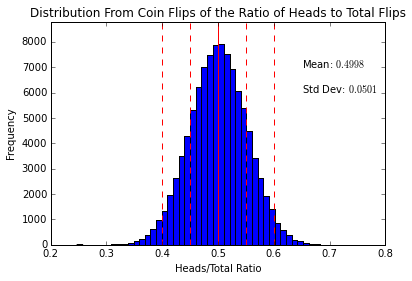

In [111]:
mean = st.mean(values)
stdev = st.pstdev(values)

plt.hist(values, bins=45)
plt.xlabel("Heads/Total Ratio")
plt.ylabel("Frequency")
plt.title("Distribution From Coin Flips of the Ratio of Heads to Total Flips")
ymin, ymax = plt.ylim()
ymax += 800
plt.ylim(ymin, ymax)
plt.vlines(mean, ymin, ymax, color="red")
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, linestyles="dashed", color="red")
plt.text(0.65, 7000, r'Mean: ${}$'.format(str(round(mean, 4))), fontsize=10)
plt.text(0.65, 6000, r'Std Dev: ${}$'.format(str(round(stdev, 4))), fontsize=10)
plt.show()

In [90]:
values2 = multi_sim2(n=1000)

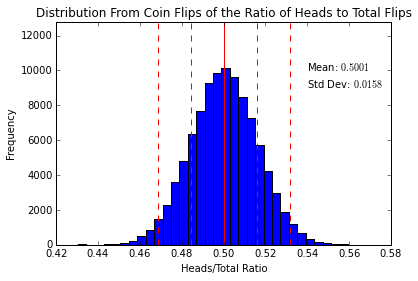

In [110]:
mean = st.mean(values2)
stdev = st.pstdev(values2)

plt.hist(values2, bins=35)
plt.xlabel("Heads/Total Ratio")
plt.ylabel("Frequency")
plt.title("Distribution From Coin Flips of the Ratio of Heads to Total Flips")
ymin, ymax = plt.ylim()
ymax += 800
plt.ylim(ymin, ymax)
plt.vlines(mean, ymin, ymax, color="red")
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, linestyles="dashed", color="red")
plt.text(0.54, 10000, r'Mean: ${}$'.format(str(round(mean, 4))), fontsize=10)
plt.text(0.54, 9000, r'Std Dev: ${}$'.format(str(round(stdev, 4))), fontsize=10)
plt.show()

#Notes
Both simulations had a mean of 0.5 (indicating a 50% occurrence heads, as would be expected).  The spread appears normally distributed for both simulations, however the spread for the  larger simulation was much tighter.  This would indicate that the standard deviation should shrink as the number of flips increases (law of large numbers describes this behavior, I believe), which we see between our two simulations.